# CMSE 202 Final Project

#### Group Members: Brady, Toan, Sophie, Sultan, and Andy
#### November 17th, 2024

## *How Treasury Yields Predict Economic Recessions*

## Background & Motivations

Our group’s interest in financial markets and personal finance has inspired us to explore indicators that might help predict economic downturns. One question that consistently arises among investors and analysts is whether certain financial metrics, like Treasury yields, can offer early signals of an impending recession. Treasury yields, particularly the spread between long-term and short-term yields, have historically been used as potential recession indicators. By understanding more about the behavior of these yields, we aim to uncover insights that could be valuable not only for investors but also for anyone interested in the broader economy.

This project is especially relevant in today’s unpredictable financial climate, where understanding potential recession signals can aid in making informed financial decisions. Through our analysis, we hope to contribute to the ongoing discussion around yield metrics and their significance in economic forecasting.

## Part 1: Data Collection and Cleaning

Package importing for the entirety of the project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We started our project by collecting data from the US Government. Most of the historical information we needed was contained on federal platforms. We collected several different yield trends for different maturity dates as well as US GDP data. All of this information was listed in csv files.

In [3]:
yr1 = pd.read_csv('data/DGS1.csv')
yr10 = pd.read_csv('data/DGS10.csv')
mo1 = pd.read_csv('data/DGS1MO.csv')
yr20 = pd.read_csv('data/DGS20.csv')
yr30 = pd.read_csv('data/DGS30.csv')
mo3 = pd.read_csv('data/DGS3MO.csv')
mo6 = pd.read_csv('data/DGS6MO.csv')
yr1.head()

,DATE,DGS1
0,1965-11-01,4.350
1,1965-11-02,.
2,1965-11-03,4.360
3,1965-11-04,4.380
4,1965-11-05,4.380


We quickly noticed that the yield data tracked back to different years. We realized that trimmed data that was all on the same timeline was crucial for proper analysis. The one-month yield started at the most recent date, having its first full year starting in 2002. Also, the data contain missing values, which need to be cleaned before further analysis

In [4]:
# Function to clean datasets
def clean_dataset(df, target_column):
    # Filter by date
    df = df[df['DATE'] >= '2002-01-01'].copy()  
    
    # Convert the 'DATE' column to DateTime format 
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    
    # Replace '.' with NaN
    df.loc[:, target_column] = df[target_column].replace('.', np.nan)
    
    # Convert the column to numeric
    df.loc[:, target_column] = pd.to_numeric(df[target_column], errors='coerce')
    
    # Drop NaN values
    df.dropna(subset=[target_column], inplace=True)
    
    return df

# Clean each dataset 
yr1 = clean_dataset(yr1, 'DGS1')
yr10 = clean_dataset(yr10, 'DGS10')
mo1 = clean_dataset(mo1, 'DGS1MO')
yr20 = clean_dataset(yr20, 'DGS20')
yr30 = clean_dataset(yr30, 'DGS30')
mo3 = clean_dataset(mo3, 'DGS3MO')
mo6 = clean_dataset(mo6, 'DGS6MO')

yr1

,DATE,DGS1
9437,2002-01-02,2.28
9438,2002-01-03,2.24
9439,2002-01-04,2.25
9440,2002-01-07,2.19
9441,2002-01-08,2.19
...,...,...
15388,2024-10-24,4.25
15389,2024-10-25,4.29
15390,2024-10-28,4.28
15391,2024-10-29,4.29


Quarterly GDP data was necessary as a "recession" occurs after two consecutive quarters of gdp drops.

In [5]:
gdp_data = pd.read_csv('data/GDP.csv')
gdp_data = clean_dataset(gdp_data, 'GDP')
gdp_data

,DATE,GDP
8,2002-01-01,10783.500
9,2002-04-01,10887.460
10,2002-07-01,10984.040
11,2002-10-01,11061.433
12,2003-01-01,11174.129
...,...,...
94,2023-07-01,27967.697
95,2023-10-01,28296.967
96,2024-01-01,28624.069
97,2024-04-01,29016.714


## Part 2: Data Visualization and Analysis

Plot of all monthly yield averages starting from 2002:

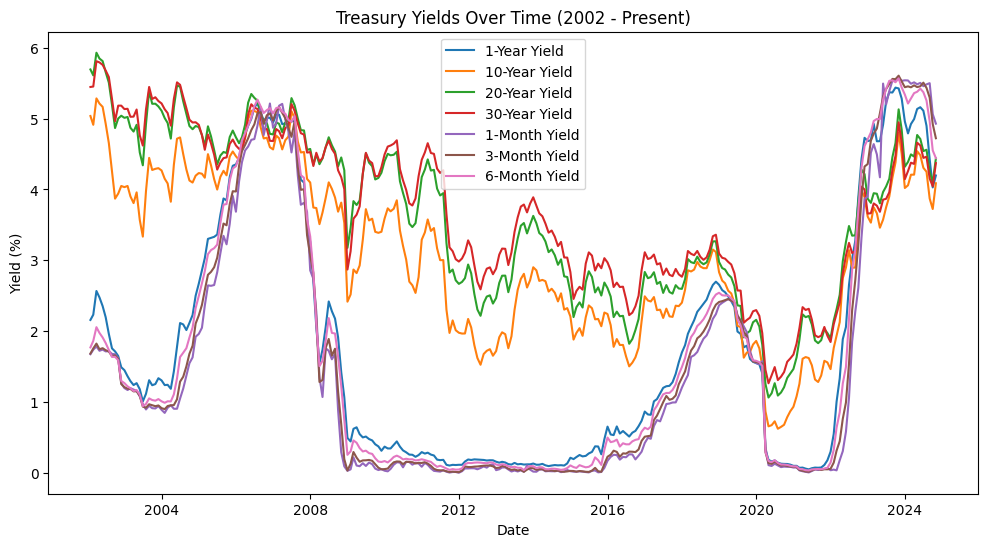

In [6]:
# Resample to monthly frequency, taking the mean of each month
yr1_monthly = yr1.resample('ME', on='DATE').mean()
yr10_monthly = yr10.resample('ME', on='DATE').mean()
yr20_monthly = yr20.resample('ME', on='DATE').mean()
yr30_monthly = yr30.resample('ME', on='DATE').mean()
mo1_monthly = mo1.resample('ME', on='DATE').mean()
mo3_monthly = mo3.resample('ME', on='DATE').mean()
mo6_monthly = mo6.resample('ME', on='DATE').mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yr1_monthly.index, yr1_monthly['DGS1'], label='1-Year Yield')
plt.plot(yr10_monthly.index, yr10_monthly['DGS10'], label='10-Year Yield')
plt.plot(yr20_monthly.index, yr20_monthly['DGS20'], label='20-Year Yield')
plt.plot(yr30_monthly.index, yr30_monthly['DGS30'], label='30-Year Yield')
plt.plot(mo1_monthly.index, mo1_monthly['DGS1MO'], label='1-Month Yield')
plt.plot(mo3_monthly.index, mo3_monthly['DGS3MO'], label='3-Month Yield')
plt.plot(mo6_monthly.index, mo6_monthly['DGS6MO'], label='6-Month Yield')

# Add labels and title
plt.title('Treasury Yields Over Time (2002 - Present)')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

#Source: ChatGPT 4.0
# Date Accessed: 11.4.2024
# Prompt: "Here is my dataframes and data labels. My code is getting a type error and I need to fix it. I am aiming to have all of the 
# yield info on one chat for display purposes."

In [7]:
yr1_quarterly = yr1.resample('QE', on='DATE').mean()
yr10_quarterly = yr10.resample('QE', on='DATE').mean()
yr20_quarterly = yr20.resample('QE', on='DATE').mean()
yr30_quarterly = yr30.resample('QE', on='DATE').mean()
mo1_quarterly = mo1.resample('QE', on='DATE').mean()
mo3_quarterly = mo3.resample('QE', on='DATE').mean()
mo6_quarterly = mo6.resample('QE', on='DATE').mean()

yr1_quarterly


,DGS1
DATE,
2002-03-31,2.318167
2002-06-30,2.346719
2002-09-30,1.814063
2002-12-31,1.53371
2003-03-31,1.300328
...,...
2023-12-31,5.225968
2024-03-31,4.9
2024-06-30,5.13619


In [8]:
full_data = pd.merge(yr1_quarterly, yr10_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, mo1_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, yr20_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, yr30_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, mo3_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, mo6_quarterly, on='DATE', how='outer')

full_data.reset_index(inplace=True)

full_data

,DATE,DGS1,DGS10,DGS1MO,DGS20,DGS30,DGS3MO,DGS6MO
0,2002-03-31,2.318167,5.079167,1.731833,5.744667,5.568333,1.754333,1.8955
1,2002-06-30,2.346719,5.106094,1.726562,5.77375,5.744062,1.74625,1.908594
2,2002-09-30,1.814063,4.272344,1.691406,5.198906,5.284375,1.67375,1.671719
3,2002-12-31,1.53371,4.004839,1.367581,5.015645,5.165484,1.365968,1.391129
4,2003-03-31,1.300328,3.92,1.180164,4.90377,5.064426,1.174754,1.191148
...,...,...,...,...,...,...,...,...
87,2023-12-31,5.225968,4.447097,5.548387,4.771129,4.590806,5.524516,5.449194
88,2024-03-31,4.9,4.156393,5.513279,4.447705,4.330492,5.454262,5.283115
89,2024-06-30,5.13619,4.44873,5.482063,4.679683,4.580794,5.466508,5.39127
90,2024-09-30,4.46375,3.954687,5.356719,4.310156,4.225313,5.225625,4.933438


In [9]:
full_data['Yield_Curve_10Y_1Y'] = full_data['DGS10'] - full_data['DGS1']
full_data['Yield_Curve_10Y_3MO'] = full_data['DGS10'] - full_data['DGS3MO']

# Display the yield curve data
full_data[['DATE', 'DGS10', 'DGS1', 'DGS3MO', 'Yield_Curve_10Y_1Y', 'Yield_Curve_10Y_3MO']]

,DATE,DGS10,DGS1,DGS3MO,Yield_Curve_10Y_1Y,Yield_Curve_10Y_3MO
0,2002-03-31,5.079167,2.318167,1.754333,2.761,3.324833
1,2002-06-30,5.106094,2.346719,1.74625,2.759375,3.359844
2,2002-09-30,4.272344,1.814063,1.67375,2.458281,2.598594
3,2002-12-31,4.004839,1.53371,1.365968,2.471129,2.638871
4,2003-03-31,3.92,1.300328,1.174754,2.619672,2.745246
...,...,...,...,...,...,...
87,2023-12-31,4.447097,5.225968,5.524516,-0.778871,-1.077419
88,2024-03-31,4.156393,4.9,5.454262,-0.743607,-1.297869
89,2024-06-30,4.44873,5.13619,5.466508,-0.68746,-1.017778
90,2024-09-30,3.954687,4.46375,5.225625,-0.509063,-1.270938


In [23]:
# Create a column to identify negative GDP growth
gdp_data['Negative_growth'] = gdp_data['GDP_growth'] < 0

# Detect recessions (two consecutive negative quarters of GDP growth)
gdp_data['Recession'] = gdp_data['Negative_growth'].shift(1) & gdp_data['Negative_growth']

# Now you can see when the recession periods occur
recessions = gdp_data[gdp_data['Recession']]
recessions




,DATE,GDP,GDP_growth,Negative_growth,Recession
36,2009-01-01,14430.902,-1.213749,True,True
37,2009-04-01,14381.236,-0.344164,True,True
81,2020-04-01,19935.444,-8.248533,True,True


In [24]:
# Add new spread columns
full_data['Yield_Curve_6MO_3MO'] = full_data['DGS6MO'] - full_data['DGS3MO']
full_data['Yield_Curve_30Y_20Y'] = full_data['DGS30'] - full_data['DGS20']
full_data['Yield_Curve_20Y_10Y'] = full_data['DGS20'] - full_data['DGS10']
full_data['Yield_Curve_3MO_1MO'] = full_data['DGS3MO'] - full_data['DGS1MO']


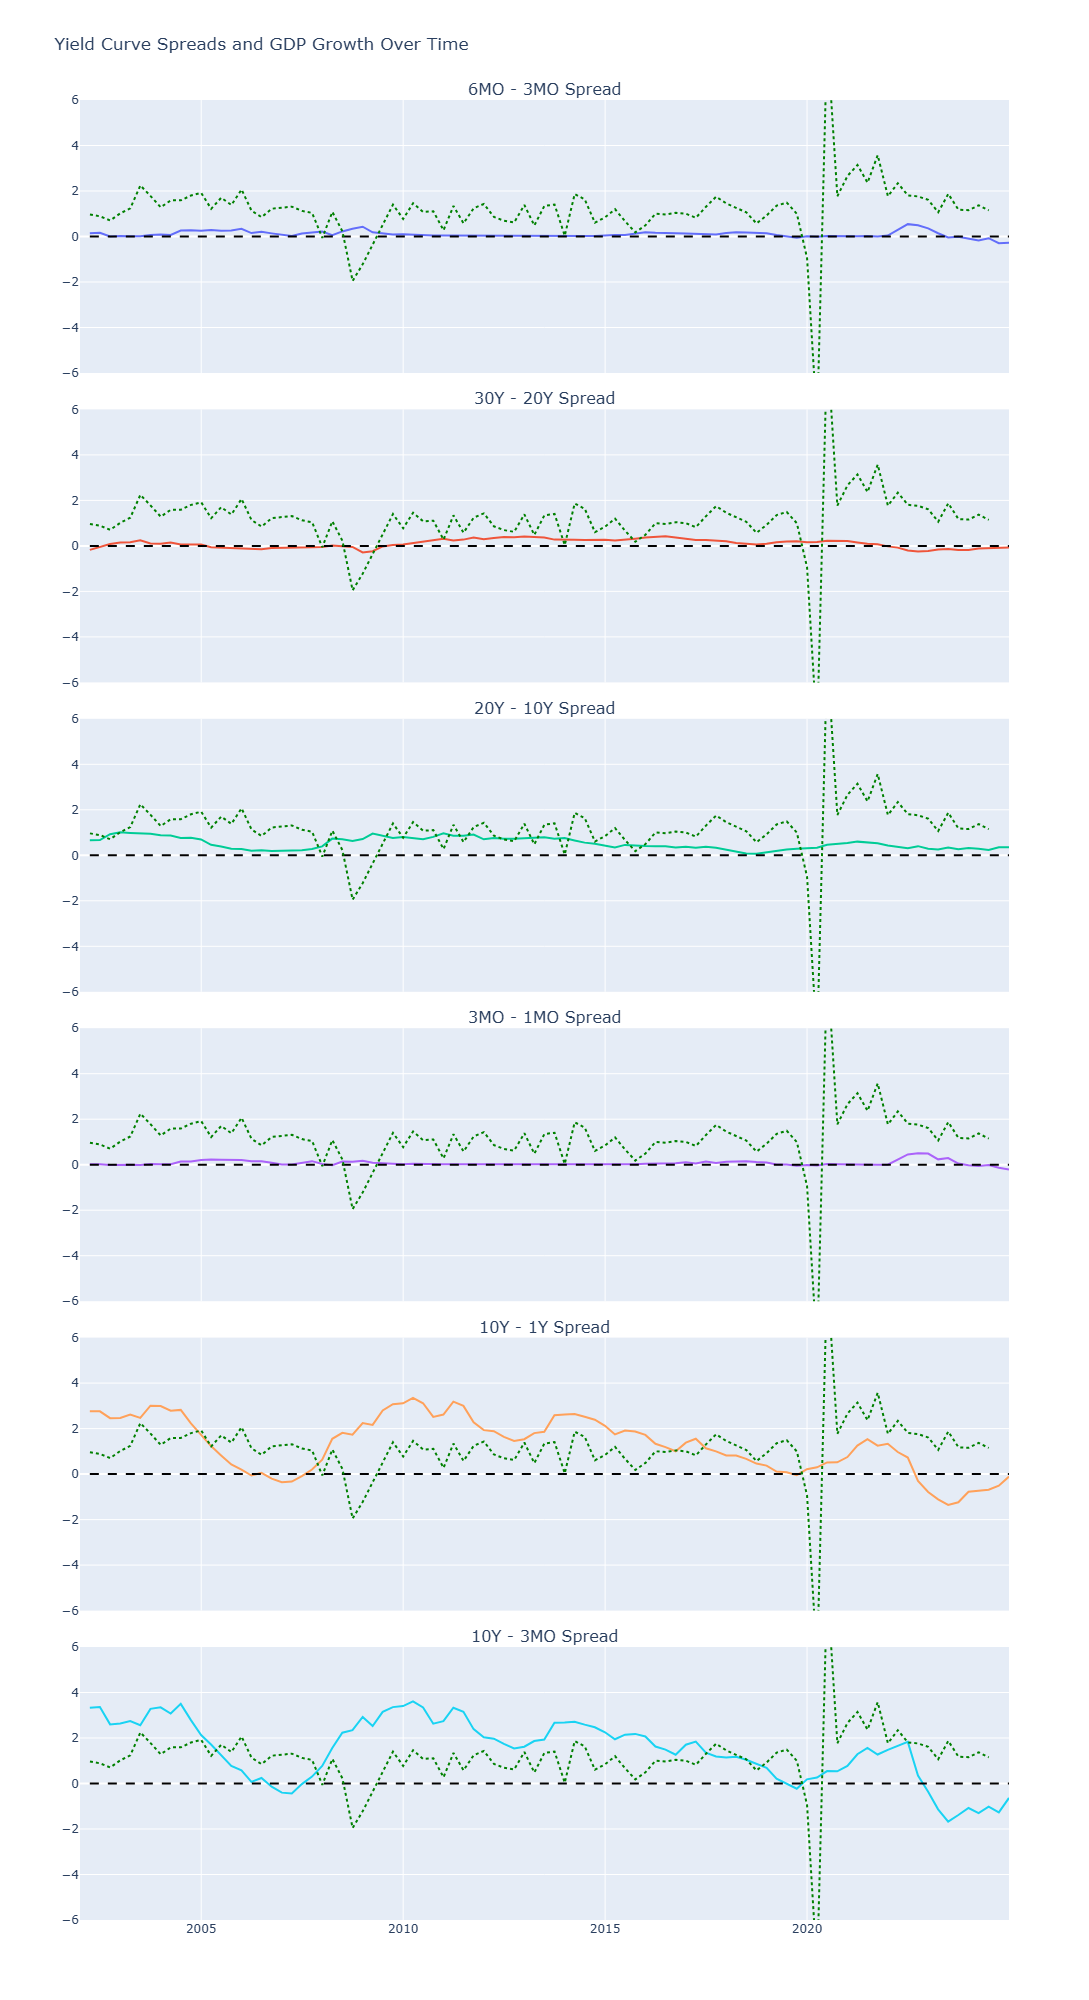

In [47]:
# Create subplots: 5 rows, 1 column
fig_spreads = make_subplots(
    rows=6, cols=1, 
    shared_xaxes=True,  
    vertical_spacing=0.02,  
    subplot_titles=[
        "6MO - 3MO Spread", 
        "30Y - 20Y Spread", 
        "20Y - 10Y Spread", 
        "3MO - 1MO Spread", 
        "10Y - 1Y Spread",
        "10Y - 3MO Spread"
    ]
)

# Add traces for each spread
fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_6MO_3MO'], mode='lines', name='6MO - 3MO Spread'),
    row = 1, col = 1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_30Y_20Y'], mode='lines', name='30Y - 20Y Spread'),
    row=2, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_20Y_10Y'], mode='lines', name='20Y - 10Y Spread'),
    row=3, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_3MO_1MO'], mode='lines', name='3MO - 1MO Spread'),
    row=4, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_10Y_1Y'], mode='lines', name='10Y-1Y Spread'),
    row=5, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_10Y_3MO'], mode='lines', name='10Y-3MO Spread'),
    row=6,col=1
)

for i in range(1, 7):  
    fig_spreads.add_trace(
        go.Scatter(x=full_data['DATE'], y=[0] * len(full_data), mode='lines', name='Zero Line', line=dict(dash='dash', color='black')),
        row=i, col=1)
    fig_spreads.add_trace(
    go.Scatter(x=gdp_data['DATE'], y=gdp_data['GDP_growth'], mode='lines', line=dict(color='green', dash='dot')),
    row=i, col=1)
    fig_spreads.update_yaxes(
    range=[-6, 6],  
    row=i, col=1)


fig_spreads.update_layout(
    title="Yield Curve Spreads and GDP Growth Over Time",
    height=2000, 
    width=1000,   
    showlegend=False  
)

fig_spreads.show()

The yield curve spreads shown in this plot have gone through some interesting fluctuations over the past 15 years. Looking at both the 10Y-1Y and 10Y-3MO spreads, I can see an overall trend of the curve flattening over time, as the gap between long-term and short-term interest rates has narrowed. There were a couple of instances, like around 2007-2008 and again in 2019-2020, where the spreads even turned negative, signaling an inverted yield curve which can be an early indicator of a potential recession.

The 10Y-1Y spread seems to be the more volatile of the two, showing wider swings compared to the 10Y-3MO. This makes sense given the greater variability in the 1-year tenor versus the 3-month. The cyclical nature of the spreads is also apparent, aligning with broader economic cycles and changes in monetary policy. 

The sharp drop in both spreads in 2020 was clearly a response to the Fed lowering rates aggressively to support the economy during the COVID-19 pandemic. 